In [1]:
import sys
sys.path.insert(0, "..")

from build_df_from_json import build_combined_df

In [2]:
import pandas as pd
import pprint
import regex as re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = build_combined_df()
df

,umw,url,tytul,tresc,att_text,att_link,att_list_len,data_pub,data_mod,view_cnt,sub_tytul,public_name
0,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Decyzja Marszałka Województwa Łódzkiego z dnia...,Decyzja Marszałka Województwa Łódzkiego z dnia...,[ŚRIII.7222.59.2023.MS DECYZJA.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-29 00:00:00,NaT,42.0,NaN,NaN
1,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Budowa i...,Projekt „Budowa instalacji fotowoltaicznej na ...,None,None,0.0,2023-06-28 00:00:00,NaT,37.0,NaN,NaN
2,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Rozwój k...,Projekt „Rozwój kultury w Gminie Koluszki” zło...,None,None,0.0,2023-06-28 00:00:00,NaT,30.0,NaN,NaN
3,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Postanowienie dotyczące decyzji Marszałka Woje...,,[GKIII.7440.8.2022.EK.AM - postanowienie + wyk...,[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-27 00:00:00,NaT,65.0,NaN,NaN
4,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny merytorycznej projektu „Budo...,Projekt „Budowa i modernizacja oświetlenia pub...,None,None,0.0,2023-06-27 00:00:00,NaT,34.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_19...,"Uprawnienia właścicieli, użytkowników wieczyst...",I. Rodzaje uprawnień oraz tryb i termin dochod...,NaN,NaN,NaN,2016-04-18 09:22:42,NaT,NaN,NaN,NaN
2010,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Ogłoszenie naboru ofert na wykonanie przez upr...,Uchwała nr 994/15 Zarządu Województwa Wielkopo...,NaN,NaN,NaN,2015-09-08 07:52:13,NaT,NaN,NaN,NaN
2011,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Zapytanie ofertowe na realizację opracowania p...,Zapytanie ofertowe na realizację opracowania p...,NaN,NaN,NaN,2015-07-24 08:12:46,NaT,NaN,NaN,NaN
2012,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Plan Zrównoważonego Rozwoju Publicznego Transp...,Aktualizacja Planu Zrównoważonego Rozwoju Publ...,NaN,NaN,NaN,2015-02-18 08:13:31,2020-12-03 13:27:07,NaN,NaN,NaN


In [5]:
len(df[df["att_list_len"] > 0]) / len(df) *100

55.41211519364448

In [6]:
len(df[df["att_list_len"] > 0])

1116

In [7]:
# len(df[df["att_list_len"] > 0])
df_att = df[df["att_list_len"] > 0]

In [8]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1593
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   umw           1116 non-null   object        
 1   url           1116 non-null   object        
 2   tytul         1116 non-null   object        
 3   tresc         1116 non-null   object        
 4   att_text      1116 non-null   object        
 5   att_link      993 non-null    object        
 6   att_list_len  1116 non-null   float64       
 7   data_pub      1108 non-null   datetime64[ns]
 8   data_mod      591 non-null    datetime64[ns]
 9   view_cnt      469 non-null    float64       
 10  sub_tytul     123 non-null    object        
 11  public_name   485 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 113.3+ KB


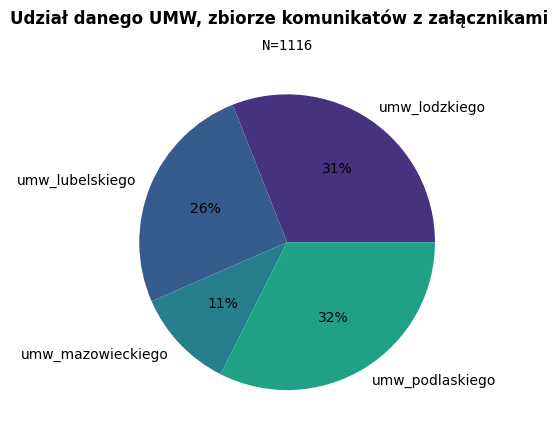

In [9]:
keys = df_att.umw.unique()
data = [len(df_att[df_att.umw == key]) for key in keys]

palette_color = sns.color_palette('viridis')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title(f"N={len(df_att)}",
            fontsize='medium',
            loc='center',
            style='normal',
            family='monospace')

plt.suptitle(f'Udział danego UMW, zbiorze komunikatów z załącznikami', fontsize='large', fontweight='bold')
plt.show()

plt.show()

In [10]:
df["tresc"]

0       Decyzja Marszałka Województwa Łódzkiego z dnia...
1       Projekt „Budowa instalacji fotowoltaicznej na ...
2       Projekt „Rozwój kultury w Gminie Koluszki” zło...
3                                                        
4       Projekt „Budowa i modernizacja oświetlenia pub...
                              ...                        
2009    I. Rodzaje uprawnień oraz tryb i termin dochod...
2010    Uchwała nr 994/15 Zarządu Województwa Wielkopo...
2011    Zapytanie ofertowe na realizację opracowania p...
2012    Aktualizacja Planu Zrównoważonego Rozwoju Publ...
2013    Ogłoszenie o zamiarze bezpośredniego zawarcia ...
Name: tresc, Length: 2014, dtype: object

In [11]:
df_att["comms_length"] = df["tresc"].apply(lambda x: len(str(x).split(" ")))

/tmp/ipykernel_1187/2929176108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_att["comms_length"] = df["tresc"].apply(lambda x: len(str(x).split(" ")))


In [12]:
df_att

,umw,url,tytul,tresc,att_text,att_link,att_list_len,data_pub,data_mod,view_cnt,sub_tytul,public_name,comms_length
0,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Decyzja Marszałka Województwa Łódzkiego z dnia...,Decyzja Marszałka Województwa Łódzkiego z dnia...,[ŚRIII.7222.59.2023.MS DECYZJA.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-29,NaT,42.0,NaN,NaN,18
3,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Postanowienie dotyczące decyzji Marszałka Woje...,,[GKIII.7440.8.2022.EK.AM - postanowienie + wyk...,[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-27,NaT,65.0,NaN,NaN,1
5,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Obwieszczenie o wydaniu decyzji w sprawie zatw...,,[GKIII.7440.2.2023.EK - obwieszczenie o decyzj...,[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,2.0,2023-06-27,2023-06-27,20.0,NaN,NaN,1
6,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Obwieszczenie o wydanej dla ZGO AQUARIUM Sp. z...,Obwieszczenie o wydanej dla ZGO AQUARIUM Sp. z...,[obwieszczenie ŚRIII.7222.128.2022.ML.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-26,NaT,17.0,NaN,NaN,29
7,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Decyzja Marszałka Województwa Łódzkiego z dnia...,Decyzja Marszałka Województwa Łódzkiego z dnia...,[decyzja ŚRIII.7222.128.2022.ML.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-26,NaT,14.0,NaN,NaN,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,umw_podlaskiego,https://bip.wrotapodlasia.pl/wojewodztwo/akty_...,Uchwała Nr332/6253/2023 Zarządu Województwa Po...,UCHWAŁA NR 332/6253/2023ZARZĄDU WOJEWÓDZTWA PO...,[Umowa Miasto Suwałki.pdf],[https://bip.wrotapodlasia.pl/resource/40292/1...,1.0,2023-05-19,2023-05-19,NaN,NaN,Urząd Marszałkowski Województwa Podlaskiego,245
1590,umw_podlaskiego,https://bip.wrotapodlasia.pl/wojewodztwo/akty_...,Uchwała Nr332/6256/2023 Zarządu Województwa Po...,UCHWAŁA NR 332/6256/2023ZARZĄDU WOJEWÓDZTWA PO...,[Umowa Powiat Kolneński.pdf],[https://bip.wrotapodlasia.pl/resource/40291/1...,1.0,2023-05-19,2023-05-19,NaN,NaN,Urząd Marszałkowski Województwa Podlaskiego,232
1591,umw_podlaskiego,https://bip.wrotapodlasia.pl/wojewodztwo/akty_...,Uchwała Nr332/6251/2023 Zarządu Województwa Po...,UCHWAŁA NR 332/6251/2023ZARZĄDU WOJEWÓDZTWA PO...,[Umowa Gmina Wyszki.pdf],[https://bip.wrotapodlasia.pl/resource/40290/1...,1.0,2023-05-19,2023-05-19,NaN,NaN,Urząd Marszałkowski Województwa Podlaskiego,212
1592,umw_podlaskiego,https://bip.wrotapodlasia.pl/wojewodztwo/akty_...,Uchwała Nr332/6243/2023 Zarządu Województwa Po...,UCHWAŁA NR 332/6243/2023ZARZĄDU WOJEWÓDZTWA PO...,[Umowa Gmina Czarna Białostocka.pdf],[https://bip.wrotapodlasia.pl/resource/40289/1...,1.0,2023-05-19,2023-05-19,NaN,NaN,Urząd Marszałkowski Województwa Podlaskiego,227


In [13]:
len(df[(df["att_list_len"] <= 0) | (df["att_list_len"].isna())])

898

In [14]:
df.umw.unique()

array(['umw_lodzkiego', 'umw_lubelskiego', 'umw_mazowieckiego',
       'umw_podlaskiego', 'umw_wielkopolskiego'], dtype=object)

In [15]:
# len(df[(df["att_list_len"] <= 0) | (df["att_list_len"].isna())])
df_noatt = df[(df["att_list_len"] <= 0) | (df["att_list_len"].isna())]

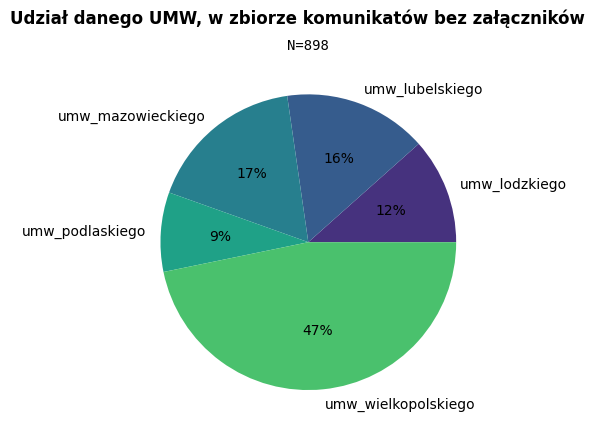

In [16]:
keys = df_noatt.umw.unique()
data = [len(df_noatt[df_noatt.umw == key]) for key in keys]

palette_color = sns.color_palette('viridis')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title(f"N={len(df_noatt)}",
            fontsize='medium',
            loc='center',
            style='normal',
            family='monospace')

plt.suptitle(f'Udział danego UMW, w zbiorze komunikatów bez załączników ', fontsize='large', fontweight='bold')
plt.show()

plt.show()

In [17]:
def gen_column_plot(nazwa_umw):
    df_tmp = df_att[df_att["umw"] == f"{nazwa_umw}"]

    plt.figure(figsize=(50, 6))

    sns.countplot(x=df_tmp['comms_length'])
                #    order=df_tmp['comms_length'].value_counts().index)

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.grid()
    plt.show()

In [18]:
for i in df_att.umw.unique().tolist():
    print(f"{i.upper()} STATS:\n{df_att[df_att['umw'] == i].comms_length.describe()}\n")
# df_att[df_att["umw"] == "umw_lodzkiego"]


UMW_LODZKIEGO STATS:
count    346.000000
mean      55.257225
std       78.653821
min        1.000000
25%       16.000000
50%       29.000000
75%       59.000000
max      496.000000
Name: comms_length, dtype: float64

UMW_LUBELSKIEGO STATS:
count    285.000000
mean     168.971930
std      138.094601
min        1.000000
25%       36.000000
50%      128.000000
75%      276.000000
max      515.000000
Name: comms_length, dtype: float64

UMW_MAZOWIECKIEGO STATS:
count     123.000000
mean      269.276423
std       251.216493
min        22.000000
25%        84.500000
50%       163.000000
75%       410.500000
max      1132.000000
Name: comms_length, dtype: float64

UMW_PODLASKIEGO STATS:
count     362.000000
mean      151.958564
std       169.799967
min         1.000000
25%         1.000000
50%       152.500000
75%       244.750000
max      1020.000000
Name: comms_length, dtype: float64



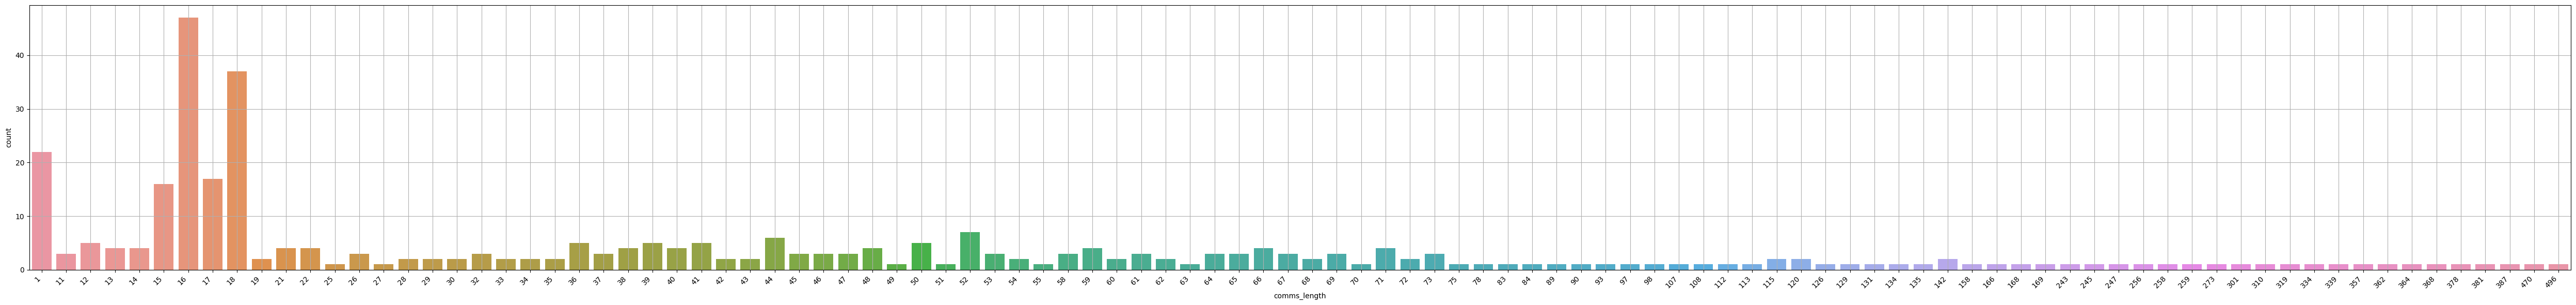

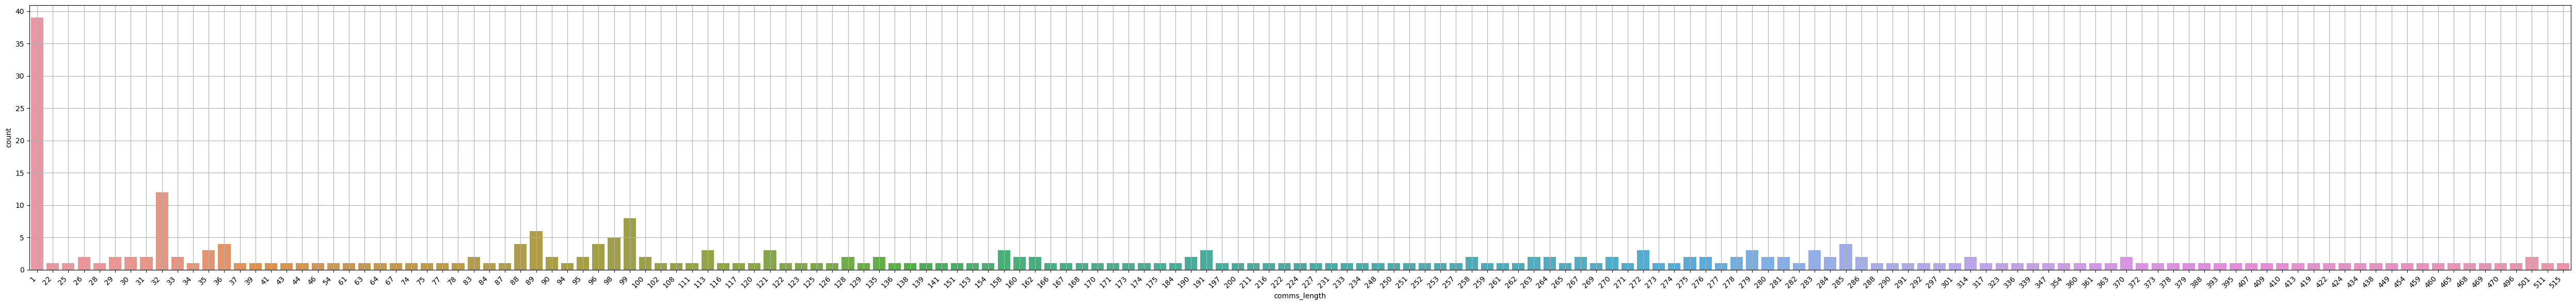

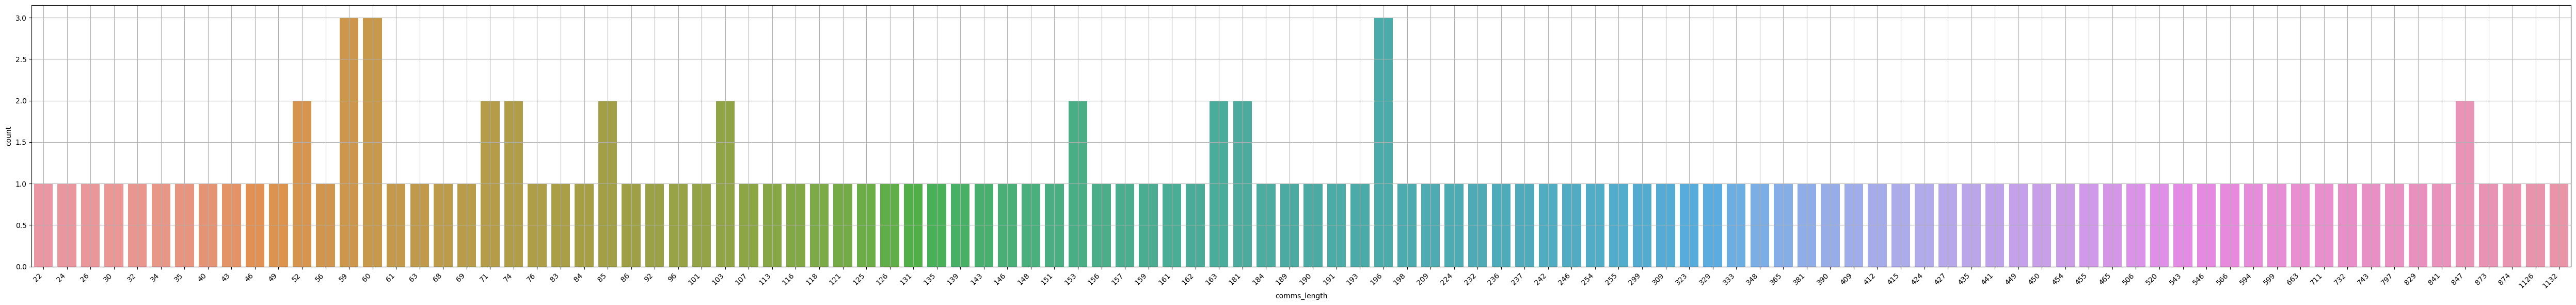

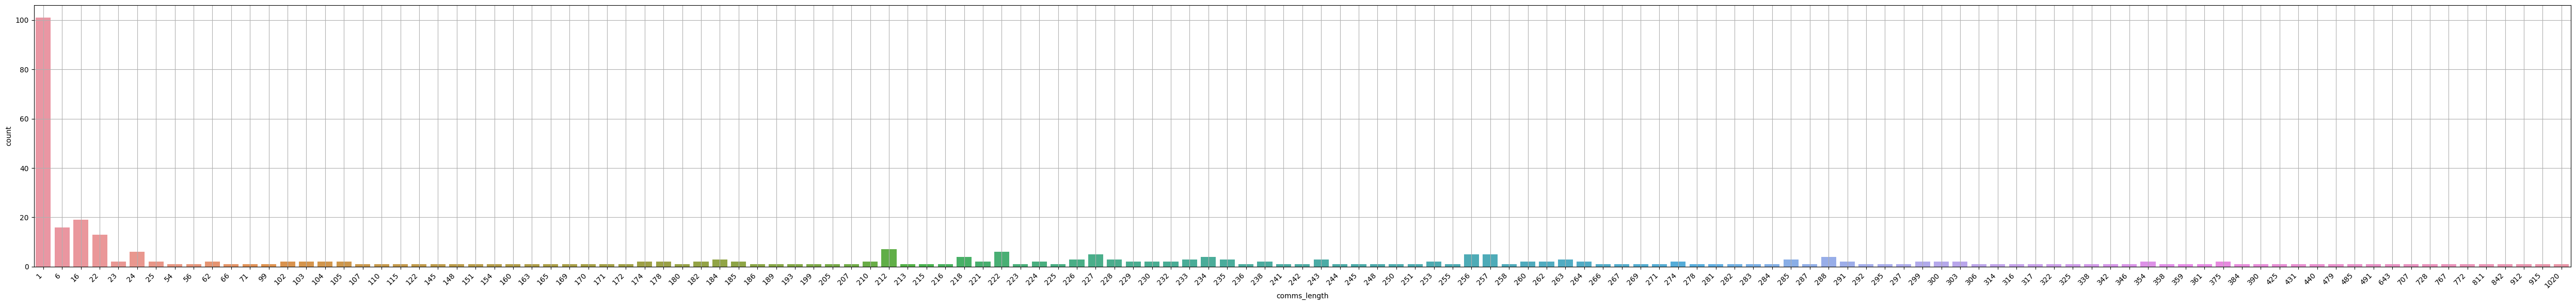

In [19]:
for i in df_att.umw.unique().tolist():
    gen_column_plot(i)

In [20]:
lista = ["jakis_test.pdf", "jakis_inny_tekst.docx", "jesczce_inny_tekst.jpg"]

match = re.compile("\.(.*)")
for l in lista:
    print(match.findall(l))

['pdf']
['docx']
['jpg']


In [21]:
df_att["att_link"][0]
# for i in df_att["att_link"][0]:
    # print(i)

['https://bip.lodzkie.pl/ogloszenia/komunikaty/item/download/33550_0ecc62f5df92affc732a90c640022f2a']

In [22]:
def extract_format(lista_zalacznikow):
    new_list = []
    for l in lista_zalacznikow:
        # if len(l) > 5:
        #     pass
        # else:
        zal_format = l.split(".")[-1]
        new_list.append(zal_format)
    return new_list

full_dict = {}
dict_list = []

for index, row in df_att.iterrows():

    # print({df_att["umw"].iloc[index] : df_att["att_link"].iloc[index]})
    try:
        tmp_dict = {"nazwa_umw" : df_att["umw"].iloc[index],
                    "zalaczniki" : extract_format(df_att["att_link"].iloc[index])
        }
    except:
        tmp_dict = {"nazwa_umw" : None,
                    "zalaczniki" : None
        }

    dict_list.append(tmp_dict)

for i in range(len(dict_list)):
    full_dict[i] = dict_list[i]

pprint.pprint(full_dict)

{0: {'nazwa_umw': 'umw_lodzkiego',
     'zalaczniki': ['pl/ogloszenia/komunikaty/item/download/33550_0ecc62f5df92affc732a90c640022f2a']},
 1: {'nazwa_umw': 'umw_lodzkiego',
     'zalaczniki': ['pl/ogloszenia/komunikaty/item/download/33518_577e181109311c1840e224859bd29ab5']},
 2: {'nazwa_umw': 'umw_lodzkiego',
     'zalaczniki': ['pl/ogloszenia/komunikaty/item/download/33474_772ffa0855b70b6342707ee8d261b9b3']},
 3: {'nazwa_umw': 'umw_lodzkiego',
     'zalaczniki': ['pl/ogloszenia/komunikaty/item/download/33426_858eecd01e1d27b7817d455aa8ee7989']},
 4: {'nazwa_umw': 'umw_lodzkiego',
     'zalaczniki': ['pl/ogloszenia/komunikaty/item/download/33393_2c8f9e8ff336ed4c9e4d72fc7ca76e20']},
 5: {'nazwa_umw': 'umw_lodzkiego',
     'zalaczniki': ['pl/ogloszenia/komunikaty/item/download/33387_ddc8ff1314faaa17aa64777a412059eb']},
 6: {'nazwa_umw': 'umw_lodzkiego',
     'zalaczniki': ['pl/ogloszenia/komunikaty/item/download/33330_7b7eb7e66f5222bc32bd89ca891bbc59']},
 7: {'nazwa_umw': 'umw_lodzkiego',

In [23]:
test_txt = "jakis_ssobie_tekst_jest"
print(range(len(test_txt)))

range(0, 23)


In [24]:
# df_att_stat = pd.DataFrame(full_dict).T
# df_att_stat

full_dict2 = {}
full_list2 = []
for key, value in full_dict.items():
    if value["nazwa_umw"] != "umw_lodzkiego" and value["nazwa_umw"] != None:
        # print(value["nazwa_umw"], value["zalaczniki"])
        for v in value["zalaczniki"]:
            # print(len(v))
            if len(v) < 5:
                full_list2.append({"nazwa_umw":value["nazwa_umw"],
                                   "format_zalacznika": v})
            else:
                v = "zalacznik_bez_formatu"
                full_list2.append({"nazwa_umw":value["nazwa_umw"],
                                   "format_zalacznika": v})
                
for i in range(len(full_list2)):
    full_dict2[i] = full_list2[i]

pprint.pprint(full_dict2)

{0: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 1: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 2: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 3: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 4: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 5: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 6: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 7: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 8: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 9: {'format_zalacznika': 'doc', 'nazwa_umw': 'umw_lubelskiego'},
 10: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 11: {'format_zalacznika': 'pdf', 'nazwa_umw': 'umw_lubelskiego'},
 12: {'format_zalacznika': 'doc', 'nazwa_umw': 'umw_lubelskiego'},
 13: {'format_zalacznika': 'docx', 'nazwa_umw': 'umw_lubelskiego'},
 14: {'format_zalacznika': 'docx', 'nazwa_umw': 'umw_lubelskiego'},
 15

In [25]:
df_att_final= pd.DataFrame(full_dict2).T

In [26]:
df_att_final[df_att_final["nazwa_umw"] == "umw_podlaskiego"]

,nazwa_umw,format_zalacznika
627,umw_podlaskiego,pdf
628,umw_podlaskiego,pdf
629,umw_podlaskiego,pdf
630,umw_podlaskiego,pdf
631,umw_podlaskiego,pdf
...,...,...
866,umw_podlaskiego,pdf
867,umw_podlaskiego,pdf
868,umw_podlaskiego,pdf
869,umw_podlaskiego,pdf


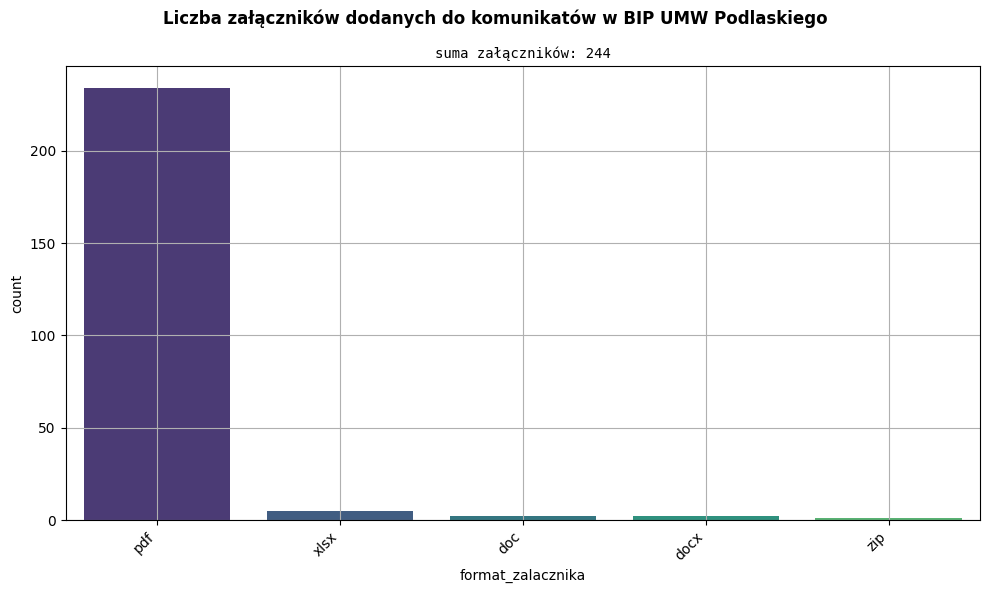

In [32]:
df_att_podl = df_att_final[df_att_final["nazwa_umw"] == "umw_podlaskiego"]


palette_color = sns.color_palette('viridis')
plt.figure(figsize=(10, 6))

# sns.countplot(x=df_att_final['format_zalacznika'].count(), order=df_att_final['format_zalacznika'].value_counts())
sns.countplot(x=df_att_podl['format_zalacznika'], order=df_att_podl['format_zalacznika'].value_counts().index, palette=palette_color)

plt.xticks(rotation=45, ha='right')

plt.title(f"suma załączników: {df_att_podl['format_zalacznika'].value_counts().sum()}",
            fontsize='medium',
            loc='center',
            style='normal',
            family='monospace')


plt.suptitle(f'Liczba załączników dodanych do komunikatów w BIP UMW Podlaskiego', fontsize='large', fontweight='bold')

plt.tight_layout()
plt.grid()
plt.show()

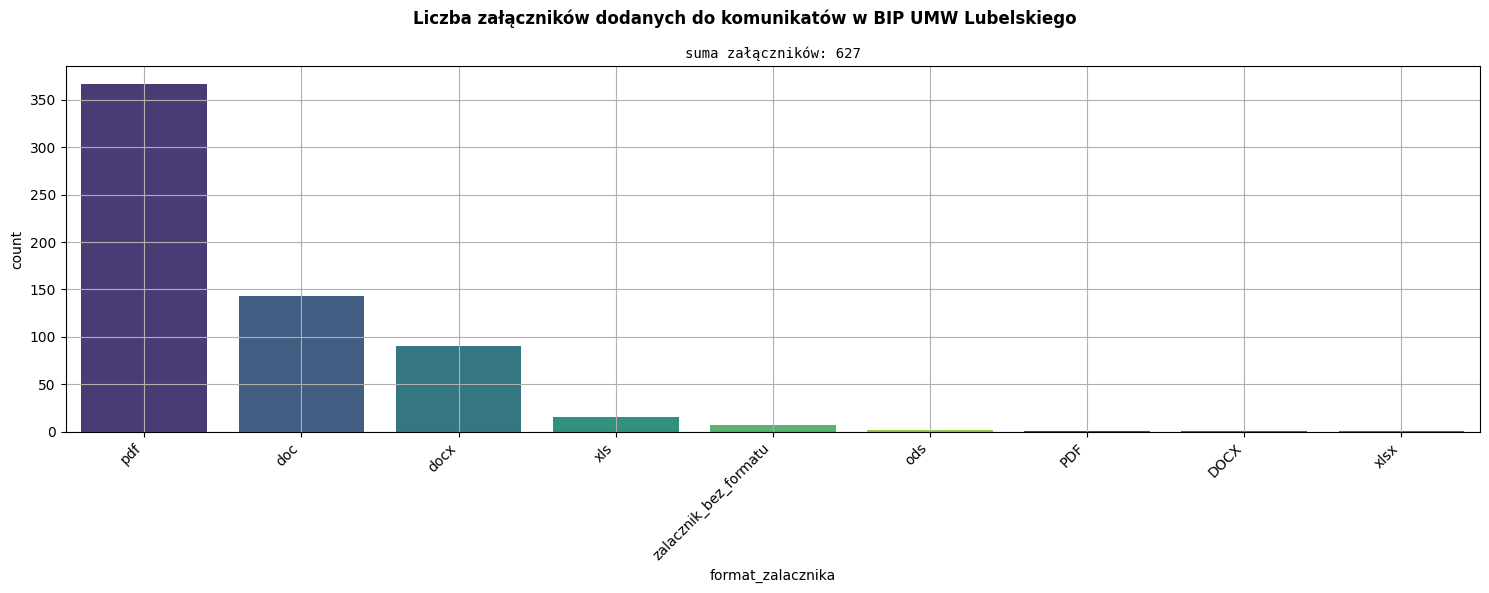

In [34]:
df_att_lubel = df_att_final[df_att_final["nazwa_umw"] == "umw_lubelskiego"]

plt.figure(figsize=(15, 6))
palette_color = sns.color_palette('viridis')

# sns.countplot(x=df_att_final['format_zalacznika'].count(), order=df_att_final['format_zalacznika'].value_counts())
sns.countplot(x=df_att_lubel['format_zalacznika'], order=df_att_lubel['format_zalacznika'].value_counts().index, palette=palette_color)

plt.xticks(rotation=45, ha='right')

plt.title(f"suma załączników: {df_att_lubel['format_zalacznika'].value_counts().sum()}",
            fontsize='medium',
            loc='center',
            style='normal',
            family='monospace')

plt.suptitle(f'Liczba załączników dodanych do komunikatów w BIP UMW Lubelskiego', fontsize='large', fontweight='bold')

plt.tight_layout()
plt.grid()
plt.show()